K-Means Clustering

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import joblib 

In [65]:
# Load dataset
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/processed/processed_train.csv')
df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445


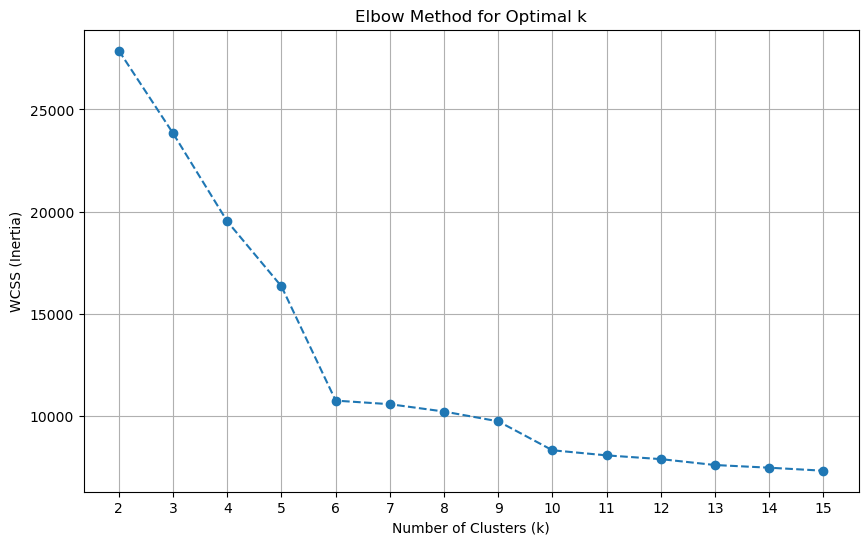

In [66]:
# Determine the Optimal Number of Clusters (k)

# Method A: Elbow Method (using Inertia/WCSS)
wcss = [] # Within-Cluster Sum of Squares
k_range = range(2, 16) # Test k values from 2 up to 15

for k in k_range:
    kmeans_test = KMeans(n_clusters=k,
                         init='k-means++',
                         n_init='auto',    # Automatically run multiple initializations
                         random_state=42)  # For reproducibility
    kmeans_test.fit(df)
    wcss.append(kmeans_test.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()




Calculated Silhouette Score for k=2: 0.1857
Calculated Silhouette Score for k=3: 0.2564
Calculated Silhouette Score for k=4: 0.3321
Calculated Silhouette Score for k=5: 0.3866
Calculated Silhouette Score for k=6: 0.4891
Calculated Silhouette Score for k=7: 0.4034
Calculated Silhouette Score for k=8: 0.3863
Calculated Silhouette Score for k=9: 0.3078
Calculated Silhouette Score for k=10: 0.3348


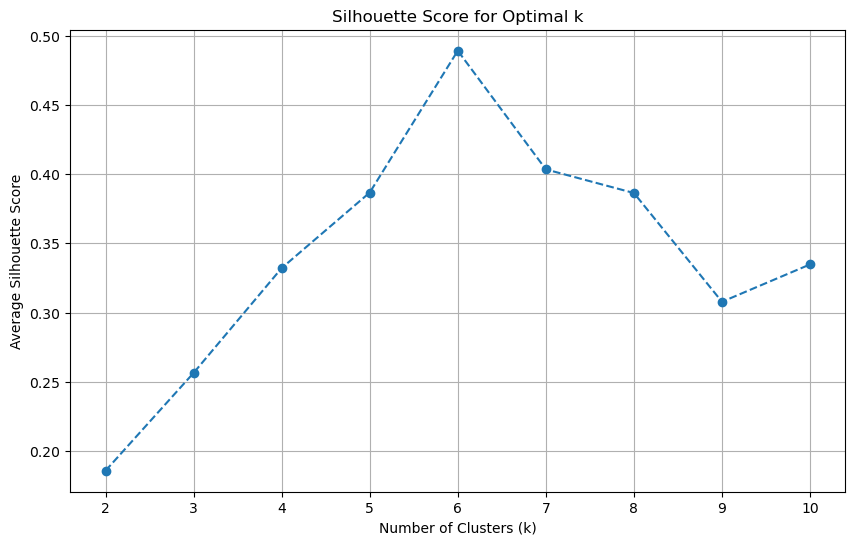

In [67]:
# Method B: Silhouette Score
silhouette_scores = []
k_range_silhouette = range(2, 11) # Test fewer k values due to computation time

for k in k_range_silhouette:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    cluster_labels = kmeans_test.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Calculated Silhouette Score for k={k}: {silhouette_avg:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


In [68]:
# Choose k and Run K-Means Clustering

chosen_k = 6

kmeans = KMeans(n_clusters=chosen_k,
                init='k-means++',
                n_init='auto',
                max_iter=300,
                random_state=42)
# Fit the model and predict cluster labels
clusters = kmeans.fit_predict(df)
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
kmeans.cluster_centers_

Cluster centers shape: (6, 16)


array([[-2.63878759e-01, -5.37363075e-01,  6.88076287e-01,
        -1.02841055e-01, -8.28957479e-02, -3.76710030e-02,
        -2.28141001e-03,  1.11832783e-02, -3.89109045e-03,
        -3.06633962e-02,  5.60812029e-03,  1.52042758e-03,
        -2.99214080e-03,  4.24666955e-03,  6.52161401e-04,
        -2.00729684e-03],
       [-1.79751673e-01, -2.20280527e-01, -3.32839899e-01,
         8.11949633e-01, -2.19665581e-01, -5.07281159e-02,
        -1.72864831e-02,  2.18350548e-02, -1.34410248e-02,
        -2.73640289e-02,  1.06442192e-02,  6.02839635e-03,
         2.71263439e-03,  7.47786393e-03,  1.00035429e-03,
        -1.03425418e-03],
       [ 8.04546025e-01,  1.51044148e-01,  6.66367978e-02,
        -2.84086106e-02, -4.73531520e-02, -1.36780997e-02,
        -1.04048000e-02,  1.28936501e-02, -1.16494455e-03,
        -1.03282359e-02,  8.83212585e-04,  5.81393544e-03,
        -2.86118439e-04,  3.99928812e-03,  3.29605927e-04,
        -1.55884115e-03],
       [-2.00061620e-01, -3.04006327e

In [69]:
#  Add Cluster Labels to DataFrame

df['cluster'] = clusters

# Analyze cluster sizes
print(df['cluster'].value_counts().sort_index())

cluster
0    4603
1    3844
2    7038
3    4032
4    3401
5    5444
Name: count, dtype: int64


In [70]:
df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,cluster
0,0.814401,0.233626,0.132828,-0.015186,-0.311880,0.333710,0.216256,-0.165217,-0.279675,0.001896,0.220046,-0.250754,0.023256,-0.098973,-0.027108,-0.014240,2
1,0.788769,0.214497,0.126871,0.001028,-0.360252,0.424255,0.208152,0.141608,0.328986,0.056779,-0.144269,-0.108526,-0.155290,-0.085865,0.077608,-0.107197,2
2,0.786633,0.233628,0.162003,-0.008777,-0.408683,0.422581,0.207997,-0.058942,-0.019996,0.252224,0.267590,0.198441,0.027936,-0.106465,-0.125444,-0.104068,2
3,0.792041,0.239691,0.151408,-0.005893,-0.376406,0.378263,0.252594,-0.091477,-0.117862,0.072759,-0.146978,0.012128,0.144868,0.039337,0.053666,0.134730,2
4,0.790116,0.234139,0.139443,0.004712,-0.392245,0.447621,0.197345,-0.009376,0.306702,0.040068,-0.076781,-0.106108,-0.018365,0.093827,-0.024956,0.131445,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,-0.083234,-0.123701,-0.107574,0.021975,0.492684,-0.609807,0.210735,-0.431413,0.200592,0.595167,-0.338408,-0.051508,0.568086,-0.231174,0.197772,-0.004432,4
28358,-0.076783,-0.127896,-0.105756,0.020644,0.437323,-0.533258,0.075322,-0.485070,0.245634,0.714632,0.037290,-0.084959,0.210769,-0.248058,0.046535,0.018568,4
28359,-0.075246,-0.152119,-0.127599,0.020587,0.469841,-0.552808,0.094538,-0.337964,0.332064,0.685859,-0.226930,-0.217398,0.093780,-0.109121,-0.039561,0.051573,4
28360,-0.073692,-0.147374,-0.118733,0.039369,0.466124,-0.570297,0.163230,-0.478306,0.256420,0.718858,-0.269246,0.000862,-0.162198,-0.185499,0.103890,-0.055256,4


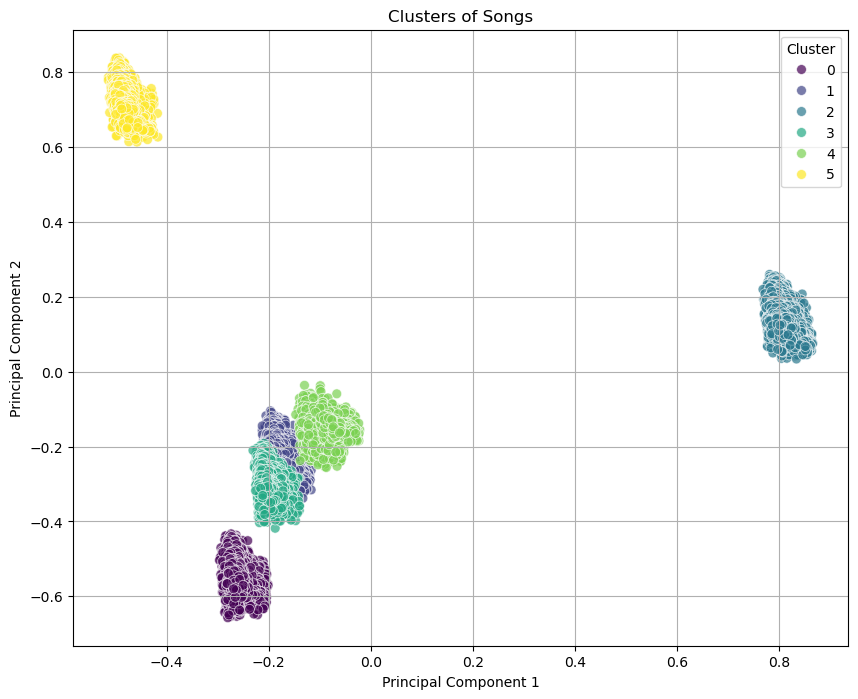

In [71]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['PC_1'], y=df['PC_2'], hue=df['cluster'], palette='viridis', s=50, alpha=0.7)
plt.title(f'Clusters of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


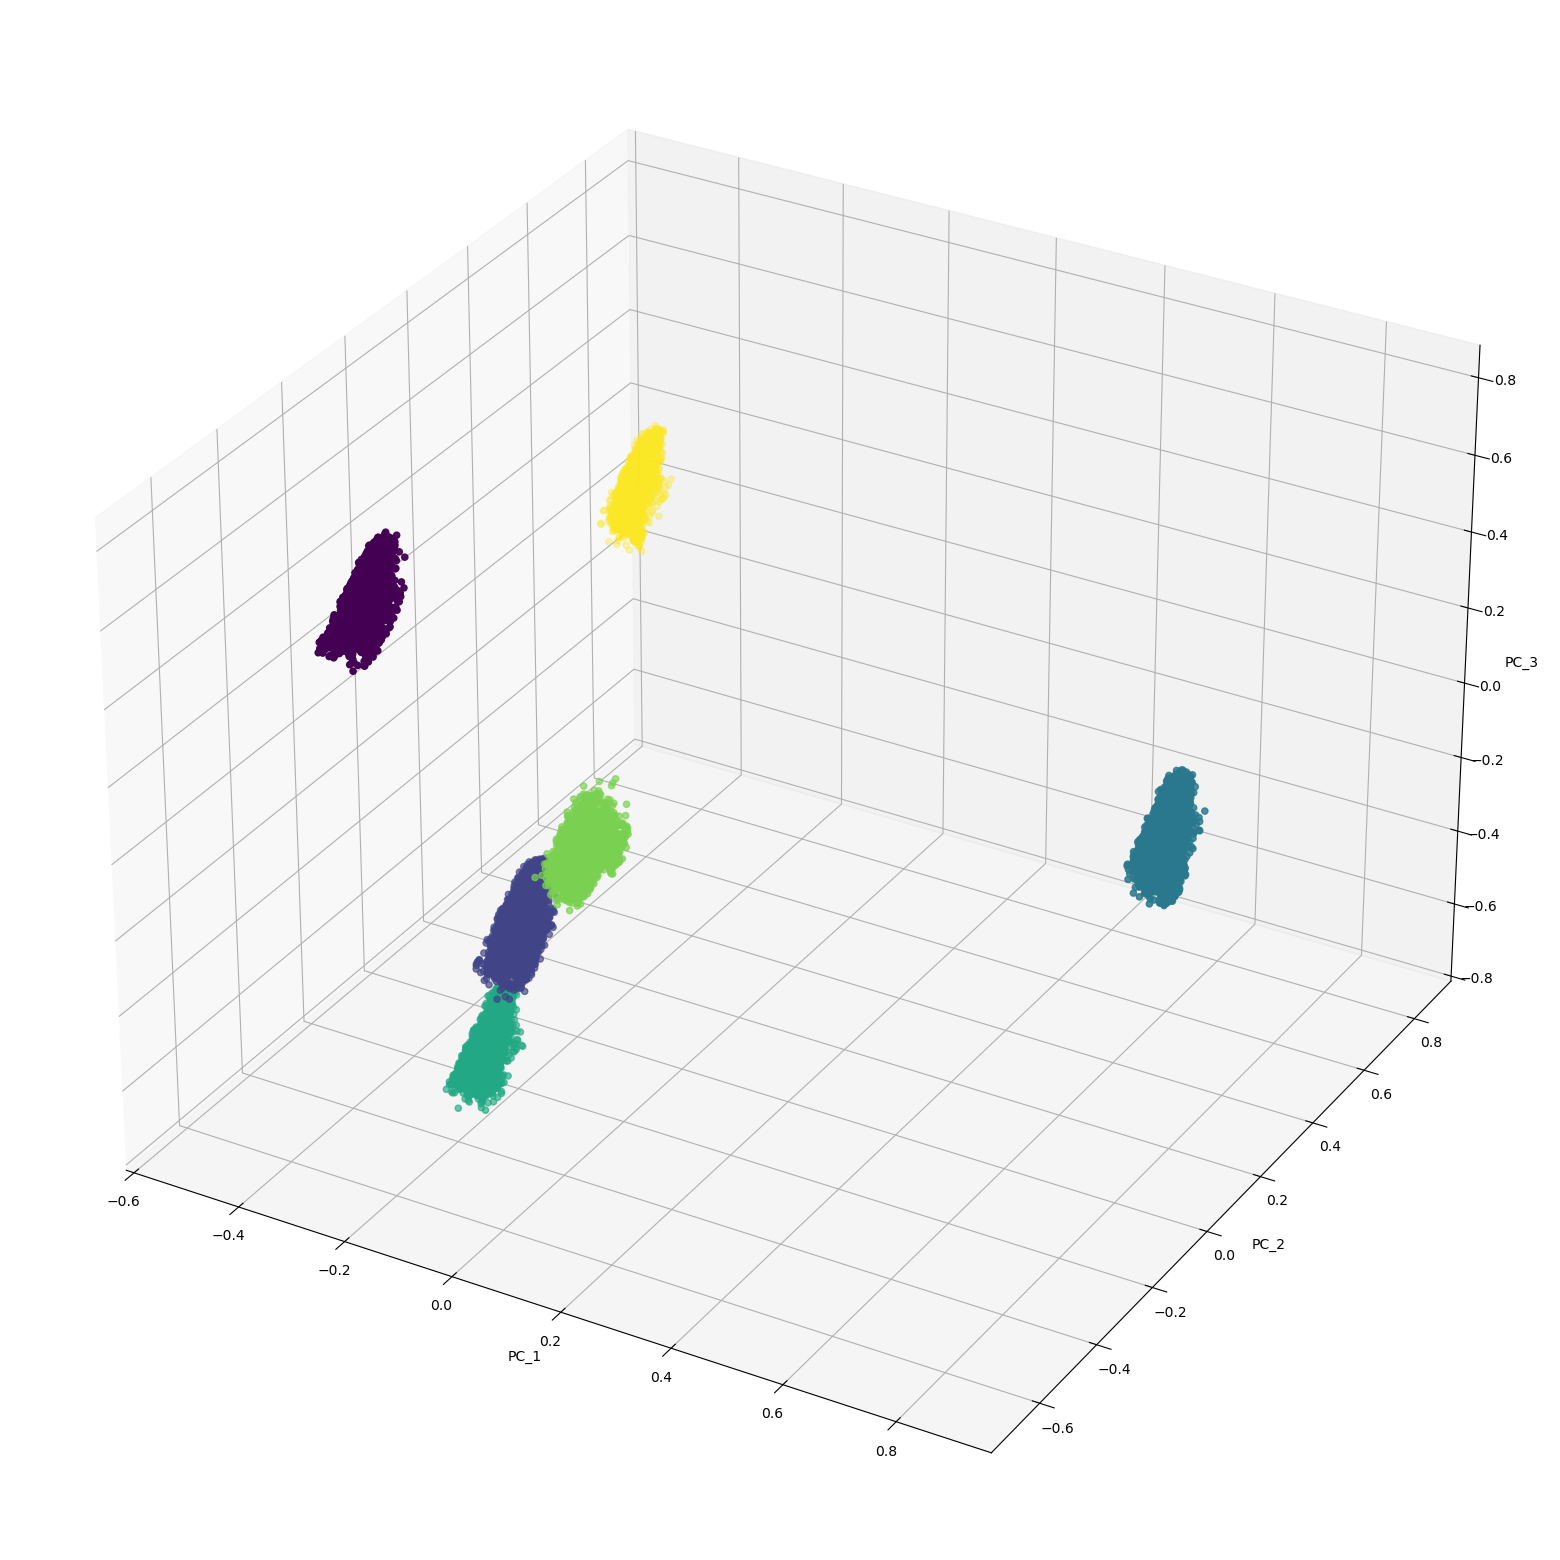

In [72]:
# make a 3D plot of clusters

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["PC_1"], df["PC_2"], df["PC_3"], c=df['cluster'])

ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

plt.gcf().set_size_inches((20, 20))  
plt.show()

New Sample Prediction

In [73]:
# Load the test dataset
test_df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/raw/recommend.csv')
test_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143


In [74]:
# Clean test dataset
columns_to_drop = ['Unnamed: 0', 'release_date', 'lyrics', 'track_name', 'artist_name', 'topic', 'like/girls']
test_prepared = test_df.drop(columns=columns_to_drop)
test_prepared.head()

,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,rock,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,reggae,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,pop,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,pop,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,pop,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


In [75]:
test_prepared.shape

(10, 18)

In [76]:
test_prepared.columns

Index(['genre', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age'],
      dtype='object')

In [77]:
# Categorical features with low cardinality
categorical_features_low = ['genre']

# Numerical features: Include 'len' and other numeric/thematic columns
numerical_features = [
    'len', 'dating', 'violence', 'world/life', 'night/time',
    'shake the audience', 'family/gospel', 'romantic', 'communication',
    'obscene', 'music', 'movement/places', 'light/visual perceptions',
    'family/spiritual', 'sadness', 'feelings', 'age'
]

# --- Create Preprocessing Pipelines ---

# Pipeline for numerical features: Scale them all to [0, 1]
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()) # Scales features to [0, 1]
])

# Pipeline for low-cardinality categorical features: One-Hot Encode then Scale
categorical_transformer_low = Pipeline(steps=[
    # Creates binary columns (0 or 1)
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    # Ensures the resulting 0/1 columns are also explicitly scaled
    ('scaler', MinMaxScaler())
])

# --- Combine Pipelines using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        # Apply numerical pipeline to all features in numerical_features list
        ('num', numerical_transformer, numerical_features),
        # Apply categorical pipeline to all features in categorical_features_low list
        ('cat_low', categorical_transformer_low, categorical_features_low)
    ],
    remainder='drop' # Drop columns not specified
)

# --- Apply the Preprocessing ---
processed_data = preprocessor.fit_transform(test_prepared)

# --- Get Feature Names After Transformation ---
try:
    # Scikit-learn >= 0.24
    feature_names_out = preprocessor.get_feature_names_out()
except AttributeError:
    # For older scikit-learn versions
    print("Warning: Could not automatically get feature names.")
    # Manual construction
    ohe_cols = preprocessor.named_transformers_['cat_low'].named_steps['onehot'].get_feature_names_out(categorical_features_low)
    feature_names_out = numerical_features + list(ohe_cols)


# Convert the processed data back to a DataFrame (for inspection)
test_prepared = pd.DataFrame(processed_data, columns=feature_names_out)
print(test_prepared.head())
print(f"\nShape of processed data: {test_prepared.shape}") # (rows, total_features_after_processing)
print("\nMin values per column:")
print(test_prepared.min().to_string())
print("\nMax values per column:")
print(test_prepared.max().to_string())

   num__len  num__dating  num__violence  num__world/life  num__night/time  \
0  0.385827     0.001140       0.640013         1.000000         0.000000   
1  0.141732     0.002691       0.053903         0.000278         0.622259   
2  0.228346     0.002181       0.887349         0.000000         0.000432   
3  0.000000     1.000000       0.003373         0.003704         0.262331   
4  0.566929     0.002425       0.000911         0.000133         0.100491   

   num__shake the audience  num__family/gospel  num__romantic  \
0                 1.000000            0.002060       0.000363   
1                 0.002444            0.290017       0.127466   
2                 0.001980            1.000000       0.000756   
3                 0.008149            0.016211       0.003320   
4                 0.002202            0.202301       1.000000   

   num__communication  num__obscene  ...  num__family/spiritual  num__sadness  \
0            0.000000      0.000427  ...               0.002551  

Number of components to explain 95% variance: 8


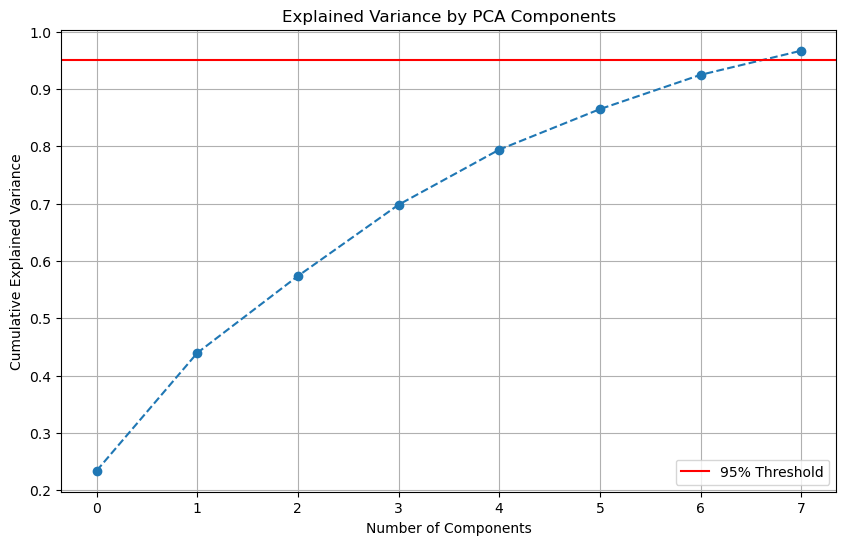

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -1.411627 -0.608701  0.109682  0.791840 -0.414785  0.538204  0.075391   
1 -0.022356  0.744650 -0.066355 -0.767532 -0.447469  0.181719 -0.285764   
2  0.596851 -1.089527  0.289027 -0.547461 -0.554523 -0.209969 -0.179956   
3  1.179155  0.183272 -0.206498  1.064981 -0.032462 -0.407211  0.193063   
4  0.730500 -0.615565 -0.733165 -0.233273  0.745200  0.731642  0.028499   

       PC_8  
0 -0.154064  
1 -0.457805  
2 -0.147934  
3 -0.365128  
4  0.045576  
Shape after PCA: (10, 8)


In [82]:
# Apply PCA for Dimensionality Reduction
# Fit PCA first to determine the number of components needed
pca_explainer = PCA(n_components=0.95) # Keep components explaining 95% variance
pca_explainer.fit(test_prepared)
n_components_pca = pca_explainer.n_components_
print(f"Number of components to explain 95% variance: {n_components_pca}")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_explainer.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold') # Add threshold line
plt.legend(loc='best')
plt.show()


# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_pca)
data_pca = pca.fit_transform(test_prepared)

# Create a DataFrame for the PCA results
pca_columns = [f'PC_{i+1}' for i in range(n_components_pca)]
test_pca = pd.DataFrame(data_pca, columns=pca_columns)

print(test_pca.head())
print(f"Shape after PCA: {test_pca.shape}")